<a href="https://colab.research.google.com/github/sonjaove/progg-and-DS-from-IITM/blob/ML/Week6_programming_ques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?



## Solution

In [4]:
# Write your solution code here
X.shape

(442, 10)

## Problem 2

How many features are there in the dataset?



## Solution

In [5]:
# Write your solution code here
X.shape

(442, 10)

## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$.

Note that it should shuffle the data pairs $(x_i, y_i)$.

What will be the mean of the first 5 values in $y$?



In [6]:
# Write your solution code here
def shuffle_data(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices]

## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [7]:
# Write your solution code here
def train_test_split(X, y, test_size=0.25):
    n = X.shape[0]
    test_count = int(test_size * n)

    # Shuffle the data first
    X, y = shuffle_data(X, y)

    # Split the data
    X_train, X_test = X[:-test_count], X[-test_count:]
    y_train, y_test = y[:-test_count], y[-test_count:]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
sum_y_test = np.sum(y_test)
print(sum_y_test)

16960.0


## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [8]:
# Write your solution code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (332, 10)
X_test shape: (110, 10)
y_train shape: (332,)
y_test shape: (110,)


## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [20]:
# Write your solution code here
def add_dummy_feature(X):
    ones_column = np.ones((X.shape[0], 1))
    return np.hstack((ones_column, X))

# Add dummy feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train = add_dummy_feature(X_train)
X_test = add_dummy_feature(X_test)

# Transpose X_train and X_test
# X_train = X_train.T
# X_test = X_test.T

# Print the shapes of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (332, 11)
X_test shape: (110, 11)


## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [14]:
# Write your solution code here
def compute_weights(X, y):
    # Ensure y is a column vector (2D)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    # Compute (X^T X)^-1 X^T y
    X_T_X_inv = np.linalg.inv(X.T @ X)
    weights = X_T_X_inv @ X.T @ y
    return weights

weights = compute_weights(X_train.T, y_train.T)

# Get the intercept (first value of the weight vector)
intercept = weights[0]
print(f"Intercept (rounded to 1 decimal place): {round(intercept[0], 1)}")


Intercept (rounded to 1 decimal place): 152.3


## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error.

What is the value of test error?


In [18]:
# Write your solution code here
def MSE(X, y, w):
    # Ensure y is a column vector
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    # Predicted values (no transpose here, X is already transposed)
    y_pred = X @ w

    # Compute MSE
    mse = np.mean((y - y_pred) ** 2)
    return mse

train_error = MSE(X_train.T, y_train, weights)
test_error = MSE(X_test.T, y_test, weights)

print(f"Train error: {train_error}")
print(f"Test error: {test_error}")

Train error: 3005.9569125216594
Test error: 2449.276750569032


## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength.


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [22]:
import numpy as np

def compute_weights_ridge(X, y, reg_strength=0.3):
    # Ensure y is a column vector
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    # Identity matrix of size (number of features)
    n_features = X.shape[1]
    I = np.eye(n_features)

    # Compute the Ridge regression weights: (X^T X + λI)^(-1) X^T y
    X_T_X_inv = np.linalg.inv(X.T @ X + reg_strength * I)
    weights = X_T_X_inv @ X.T @ y
    return weights



# Compute plain linear regression weights
weights_plain = compute_weights(X_train, y_train)

# Compute Ridge regression weights with regularization strength 0.3
weights_ridge = compute_weights_ridge(X_train, y_train, reg_strength=0.3)

# Sum of values in the weight vectors
sum_weights_plain = np.sum(weights_plain)
sum_weights_ridge = np.sum(weights_ridge)

# Reduction in sum of weights
reduction = sum_weights_plain - sum_weights_ridge

print(f"Sum of weights (plain): {sum_weights_plain}")
print(f"Sum of weights (ridge): {sum_weights_ridge}")
print(f"Reduction in sum of weights: {reduction}")


Sum of weights (plain): 1656.7656777442646
Sum of weights (ridge): 934.4082047244019
Reduction in sum of weights: 722.3574730198627


## Problem 10

Compute the train error and test error. What is their absolute difference?



In [23]:
# Write your solution code here
# Compute the train error and test error using the Ridge regression weights
train_error_ridge = MSE(X_train, y_train, weights_ridge)
test_error_ridge = MSE(X_test, y_test, weights_ridge)

# Compute the absolute difference between train and test errors
absolute_difference = abs(train_error_ridge - test_error_ridge)

print(f"Train error (ridge): {train_error_ridge}")
print(f"Test error (ridge): {test_error_ridge}")
print(f"Absolute difference: {absolute_difference}")


Train error (ridge): 2911.7379394678933
Test error (ridge): 3340.4844092098056
Absolute difference: 428.7464697419123


## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



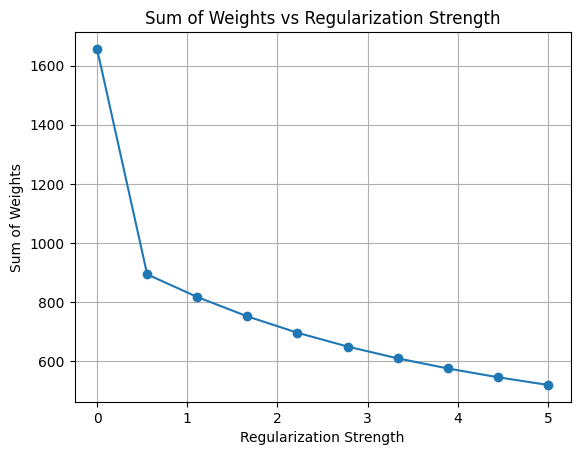

In [24]:
# Write your solution code here
import numpy as np
import matplotlib.pyplot as plt

# Generate 10 values between 0 and 5 for regularization strength
regularization_strengths = np.linspace(0, 5, 10)

# List to store the sum of weights for each regularization strength
sums_of_weights = []

# Calculate the weights and their sum for each regularization strength
for reg_strength in regularization_strengths:
    weights_ridge = compute_weights_ridge(X_train, y_train, reg_strength=reg_strength)
    sum_weights_ridge = np.sum(weights_ridge)
    sums_of_weights.append(sum_weights_ridge)

# Plot the sum of weights against the regularization strength
plt.plot(regularization_strengths, sums_of_weights, marker='o')
plt.xlabel("Regularization Strength")
plt.ylabel("Sum of Weights")
plt.title("Sum of Weights vs Regularization Strength")
plt.grid(True)
plt.show()